### **Labeling Data Dengan Roberta Classifier**

In [ ]:
#Import library yang dibutuhkan
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaModel, AdamW
from transformers import pipeline

Buka Dataset

In [ ]:
df = pd.read_csv("dataset_swch (1).csv")
df

,;Stemming
0,4;shelaemeliana sehat iya sandwich generation
1,5;film rumah swet loan recomended gusy nonton ...
2,6;tanyakanrl teman sandwich generation hedon
3,8;kabar iya kakak kakak garuda soft spoken san...
4,10;film bagus kali menang huhu misuhmisuhinkel...
...,...
1407,2501;idola perempuanperempuan dady isue sandwi...
1408,2505;convomf anak of kursus sandwich generation
1409,2506;convomf anak of kursus sandwich generation
1410,2509;inipita biar enak bada badane suka gel ge...


In [ ]:
df.rename(columns={';Stemming': 'Stemming'}, inplace=True)
df

,Stemming
0,4;shelaemeliana sehat iya sandwich generation
1,5;film rumah swet loan recomended gusy nonton ...
2,6;tanyakanrl teman sandwich generation hedon
3,8;kabar iya kakak kakak garuda soft spoken san...
4,10;film bagus kali menang huhu misuhmisuhinkel...
...,...
1407,2501;idola perempuanperempuan dady isue sandwi...
1408,2505;convomf anak of kursus sandwich generation
1409,2506;convomf anak of kursus sandwich generation
1410,2509;inipita biar enak bada badane suka gel ge...


Melakukan Data Cleaning dengan menghapus angka dan simbol yang tidak diperlukan agar tidak mengganggu proses perhitungan mesin

In [ ]:
import re

def remove_numbers_symbols(text):
  text = re.sub(r'[0-9]+', '', text) # Remove numbers
  text = re.sub(r'[^\w\s]', '', text) # Remove symbols
  return text

df['Stemming'] = df['Stemming'].apply(remove_numbers_symbols)
df

,Stemming
0,shelaemeliana sehat iya sandwich generation
1,film rumah swet loan recomended gusy nonton ta...
2,tanyakanrl teman sandwich generation hedon
3,kabar iya kakak kakak garuda soft spoken sandw...
4,film bagus kali menang huhu misuhmisuhinkeluar...
...,...
1407,idola perempuanperempuan dady isue sandwich ge...
1408,convomf anak of kursus sandwich generation
1409,convomf anak of kursus sandwich generation
1410,inipita biar enak bada badane suka gel gel san...


Menggunakan Roberta Classifier dari HuggingFace untuk mengklasifikasi teks berdasarkan label sentimennya

In [ ]:
# Klasifikasi Konten dari Dataframe dengan Roberta Classifier
roberta_classifier = pipeline('sentiment-analysis', model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa",tokenizer="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
df['label'] = df['Stemming'].apply(lambda x: roberta_classifier(x[:512])[0]['label'])  # Truncate to 512 tokens

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Tampilkan Hasil
df

,Stemming,label
0,shelaemeliana sehat iya sandwich generation,Neutral
1,film rumah swet loan recomended gusy nonton ta...,Neutral
2,tanyakanrl teman sandwich generation hedon,Neutral
3,kabar iya kakak kakak garuda soft spoken sandw...,Neutral
4,film bagus kali menang huhu misuhmisuhinkeluar...,Positive
...,...,...
1407,idola perempuanperempuan dady isue sandwich ge...,Neutral
1408,convomf anak of kursus sandwich generation,Neutral
1409,convomf anak of kursus sandwich generation,Neutral
1410,inipita biar enak bada badane suka gel gel san...,Positive


In [ ]:
df=df[['Stemming','label']]
df

,Stemming,label
0,shelaemeliana sehat iya sandwich generation,Neutral
1,film rumah swet loan recomended gusy nonton ta...,Neutral
2,tanyakanrl teman sandwich generation hedon,Neutral
3,kabar iya kakak kakak garuda soft spoken sandw...,Neutral
4,film bagus kali menang huhu misuhmisuhinkeluar...,Positive
...,...,...
1407,idola perempuanperempuan dady isue sandwich ge...,Neutral
1408,convomf anak of kursus sandwich generation,Neutral
1409,convomf anak of kursus sandwich generation,Neutral
1410,inipita biar enak bada badane suka gel gel san...,Positive


<ipython-input-10-638a77d7bef8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


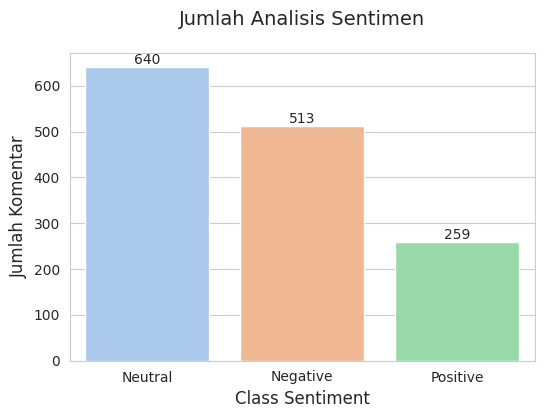

In [ ]:
sentiment_count = df['label'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
# Simpan hasil file ke dalam bentuk csv
df.to_csv("dataset_swch_roberta_ayame.csv",sep=";")